In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('fulldataplustrainmasterIOT.csv',low_memory = False)#read full data dxi
df=df.iloc[:,:]
# df = df.sample(n=500000)
df

,primary_key,Methane (ppb),Moisture,Temperature,Humidity,R2611E,R2600,R2602,R2611C,RMQ4,Methane (ppb)_state,composite_dxi_label,composite_dxi
0,prim__547728,1,17690.4870,28.915,46.45,77246.44884,12892.65565,23522.957900,26622.32222,57864.89524,2195.31155,1,12.263395
1,prim__182827,1,16875.2500,28.840,45.45,77548.17411,12979.50416,23538.955510,27052.15197,59139.86071,2195.10300,1,12.041804
2,prim__875151,1,16056.9315,28.740,44.50,78465.78140,13212.08022,23677.230340,27794.35311,60814.49119,2194.82275,1,11.840364
3,prim__661746,1,15322.0285,28.635,43.60,79713.33811,13463.32250,23935.415410,28585.73388,62568.06050,2194.53615,1,11.668186
4,prim__464204,1,14679.3625,28.515,42.80,80528.21863,13672.19197,24127.549700,29275.33616,64175.47182,2194.29040,1,11.515000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,prim__462673,1,23418.8320,29.300,56.45,59730.13700,10752.49403,8631.104832,21404.86214,52705.06707,2101.62820,0,18.184212
28368,prim__340406,1,23436.2770,29.355,56.20,59511.89601,10734.47929,8614.394989,21379.95195,52748.57886,2101.45800,0,18.197695
28369,prim__553791,1,23288.4200,29.450,55.60,59595.96967,10765.08817,8602.632831,21432.15244,52891.97719,2101.30895,0,18.157064
28370,prim__849292,1,22987.5740,29.520,54.75,59714.77438,10822.12541,8610.289298,21561.45014,53440.35685,2101.22205,0,18.058154


In [5]:
tv='Methane (ppb)'

In [7]:
from scipy import stats
res = stats.pearsonr(df['composite_dxi'].values, df[tv].values)
res

PearsonRResult(statistic=-0.47318851102881887, pvalue=0.0)

In [9]:
# tv1 = 'Bl. Pant Effluent Estimates_state'
tv1 = 'Methane (ppb)_state'

In [11]:
f1=df.loc[(df['composite_dxi'] > df['composite_dxi'].mean()) & (df[tv1] == 1)]
print('Number of instances goodQ above SXI: ',len(f1))
f2=df.loc[(df['composite_dxi'] > df['composite_dxi'].mean()) & (df[tv1] == 0)]
print('Number of instances badQ above SXI: ',len(f2))
f3=df.loc[(df['composite_dxi'] < df['composite_dxi'].mean()) & (df[tv1] == 1)]
print('Number of instances goodQ below SXI: ',len(f3))
f4=df.loc[(df['composite_dxi'] < df['composite_dxi'].mean()) & (df[tv1] == 0)]
print('Number of instances badQ below SXI: ',len(f4))

Number of instances goodQ above SXI:  0
Number of instances badQ above SXI:  0
Number of instances goodQ below SXI:  0
Number of instances badQ below SXI:  0


In [17]:
def chkdelin(tv,df1,sxi,selcls,twds,clas1,clas2,classes):
#Count of class1 in above SXI
    d1=df1.loc[(df1['composite_dxi'] >= sxi) & (df1[tv] == 1)]
    #Count of class0 in above SXI
    d2=df1.loc[(df1['composite_dxi'] >= sxi) & (df1[tv] == 0)]
    #Count of class1 in below SXI
    d3=df1.loc[(df1['composite_dxi'] < sxi) & (df1[tv] == 1)]
    #Count of class0 in below SXI
    d4=df1.loc[(df1['composite_dxi'] < sxi) & (df1[tv] == 0)]
    uy = selcls+twds
    if uy == 'cls1abv' or uy == 'cls2bel':
        clas1fnl = (len(d1)/(len(d1) +len(d2)))*100
        clas2fnl = (len(d4)/(len(d3) +len(d4)))*100 
        clsafnl = (len(d1)/len(df1[tv]))*100
        clsbfnl = (len(d4)/len(df1[tv]))*100
        print(f'{classes[1]} Above SXI: {clas1fnl}')
        print(f'{classes[0]} Below SXI: {clas2fnl}')
        print()
        print(f'{classes[1]} Above SXI: {clsafnl} of {clas1}')
        print(f'{classes[0]} Below SXI: {clsbfnl} of {clas2}')
    else:
        clas1fnl = (len(d2)/(len(d1) +len(d2)))*100
        clas2fnl = (len(d3)/(len(d3) +len(d4)))*100 
        clsafnl = (len(d2)/len(df1[tv]))*100
        clsbfnl = (len(d3)/len(df1[tv]))*100
        print(f'{classes[0]} Above SXI: {clas2fnl}')
        print(f'{classes[1]} Below SXI: {clas1fnl}')
        print()
        print(f'{classes[0]} Above SXI: {clsbfnl} of {clas2}')
        print(f'{classes[1]} Below SXI: {clsafnl} of {clas1}')

In [29]:
chkdelin(tv1,df,12.1920,'cls2','abv',23819,76181,['Good','Bad'])

ZeroDivisionError: division by zero

In [27]:
df[tv].mean()

0.6801776399266883

In [81]:
len(f2)/(len(f1) +len(f2)) # GoodQ% in above SXI

0.2015085484411666

In [83]:
len(f3)/(len(f3) +len(f4)) # GoodQ% in below SXI

0.0

In [85]:
df[tv1].value_counts()[1]/len(df)

0.23819

In [87]:
df[tv1].value_counts()

Conversion_Rate_state
0    76181
1    23819
Name: count, dtype: int64

In [25]:
# import plotly.express as px
# lo = px.histogram(df, x='checkout_price', nbins=100, title="Histogram").update_layout(
#         title="Histogram", xaxis=dict(title='checkout_price'), yaxis=dict(title="Frequency"),
#         template='simple_white').update_traces(
#         marker_color = '#490074',
#         marker_line_color = 'black',
#         marker_line_width = 1, opacity = 1)
# lo

Conversion_Rate
['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)', 'rgb(179,222,105)', 'rgb(252,205,229)', 'rgb(217,217,217)', 'rgb(188,128,189)', 'rgb(204,235,197)', 'rgb(255,237,111)']


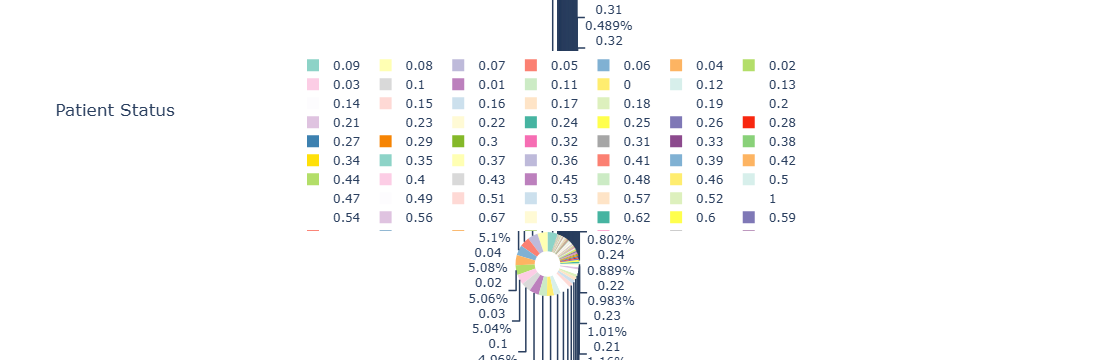

In [89]:
import plotly.express as px
from plotly.offline import plot
def tvdist(df,tv,b):
    tv_value_count = df[tv].value_counts()
    colors = px.colors.qualitative.Set3
    print(tv)
    print(colors)
    hover_text = [f"{tv}: {status}<br>Count: {count}" for status, count in tv_value_count.items()]
    try:
        nms=[b[int(i)] for i in list(tv_value_count.index)]
    except:
        nms=[i for i in list(tv_value_count.index)]
    order_status_fig = px.pie(
        names=nms,
        values=tv_value_count.values,
        title=f'Patient Status',
        hole=0.4,
        labels={'label':tv, 'value':'Count'},
        color_discrete_sequence=colors,
    #     hover_data={tv: [b[i] for i in list(tv_value_count.index)], 'Count': tv_value_count.values},
        hover_name=nms,
    )

    order_status_fig.update_traces(
    textinfo='percent+label'

    )

    order_status_fig.update_layout(
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    )
    order_status_fig.show()
    plot(order_status_fig, filename='tvdist.html')
        
    
tvdist(df,tv,['not converted','converted'])

In [124]:
# df = df.drop('Q37',axis=1)
# df

In [ ]:
df[tv].min()

In [19]:
#df = df.drop(['Unnamed: 0','userid'], axis = 1)
composite_dxi1=df['composite_dxi']
yy=df[tv]

avg_composite_dxi=np.mean(np.array(composite_dxi1))
avg_composite_dxi = 3.749
avg_composite_dxi

3.749

In [126]:
conv_ratee=df['Conversion_Rate'].mean()
conv_ratee

0.19813779999999995

In [94]:
# min_dxi = min(composite_dxi1)
# max_dxi = max(composite_dxi1)
# n = (max_dxi - min_dxi) / 10
# bin_edges = list(np.arange(round(min_dxi, 2), round(max_dxi, 2), round(n, 2)))
# bin_labels = bin_edges
# bin_edges.insert(0,0)
# bin_labels = bin_labels[1:]

In [132]:
bin_labels = []
for i in [5,20,40,60,90]:
    perc  = np.percentile(list(df['composite_dxi']),i) 
    bin_labels.append(perc)
bin_edges = bin_labels
bin_edges.insert(0,0)
bin_labels = bin_labels[1:]

In [134]:
bin_edges

[0,
 -0.02582702565832774,
 0.37078048857631507,
 0.7781398044870395,
 1.2964668888991768,
 4.526752797345503]

In [136]:
bin_labels

[-0.02582702565832774,
 0.37078048857631507,
 0.7781398044870395,
 1.2964668888991768,
 4.526752797345503]

In [112]:
bin_edges = [0,
 -0.32,
 0.5800000000000001,
 1.4800000000000002,
 2.3800000000000003,
 3.2800000000000007,
 4.180000000000001,
 5.08,
 5.98,
 6.880000000000001,
 7.780000000000001,
 8.680000000000001,
 9.580000000000002,
 10.48,
 11.38,
 12.280000000000001,
 13.180000000000001]

In [114]:
bin_labels = [-0.32,
 0.5800000000000001,
 1.4800000000000002,
 2.3800000000000003,
 3.2800000000000007,
 4.180000000000001,
 5.08,
 5.98,
 6.880000000000001,
 7.780000000000001,
 8.680000000000001,
 9.580000000000002,
 10.48,
 11.38,
 12.280000000000001,
 13.180000000000001]

In [138]:
bin_edges = [0,3,6,9,12,14,16,18]
bin_labels = [3,6,9,12,14,16,18]

# Create a new column 'Rainfall_Bucket' based on binning
df['netqyty_Bucket'] = pd.cut(df['composite_dxi'], bins=bin_edges, labels=bin_labels, right=False)

In [140]:
average_nqy = df.groupby('netqyty_Bucket')[[tv]].mean()
average_nqy

C:\Users\Prabhat\AppData\Local\Temp\ipykernel_11456\1570118886.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Conversion_Rate
netqyty_Bucket,
3,0.080982
6,0.587210
9,0.585927
12,NaN
14,NaN
16,NaN
18,NaN


In [142]:
average_nqy.dropna(inplace=True)

In [144]:
average_nqy = average_nqy.reset_index()
average_nqy

,netqyty_Bucket,Conversion_Rate
0,3,0.080982
1,6,0.587210
2,9,0.585927


In [146]:
index_to_insert = 1
new_row = {'netqyty_Bucket': avg_composite_dxi, tv: 3.749}
dss= pd.concat([average_nqy.loc[:index_to_insert - 1], pd.DataFrame([new_row]), average_nqy.loc[index_to_insert:]]).reset_index(drop=True)

In [148]:
dss.sort_values(by=['netqyty_Bucket'], inplace=True)

In [150]:
dss

,netqyty_Bucket,Conversion_Rate
0,3.000,0.080982
1,3.749,3.749000
2,6.000,0.587210
3,9.000,0.585927


In [152]:
conv_ratee = list(dss[tv])
mean_dxi = list(dss['netqyty_Bucket']) 
conv_ratee,mean_dxi

([0.08098167908762421, 3.749, 0.5872097915471409, 0.5859273422562142],
 [3.0, 3.749, 6.0, 9.0])

In [137]:
# Lime Synthesis
# [33.391666666666666,
#   67.99166666666666,
#   61.57142857142857,
#   76.36,
#   84.06666666666666],
#  [5.6000000000000005,
#   7.427,
#   7.920000000000001,
#   10.240000000000002,
#   11.400000000000002]

In [128]:
conv_ratee

0.19813779999999995

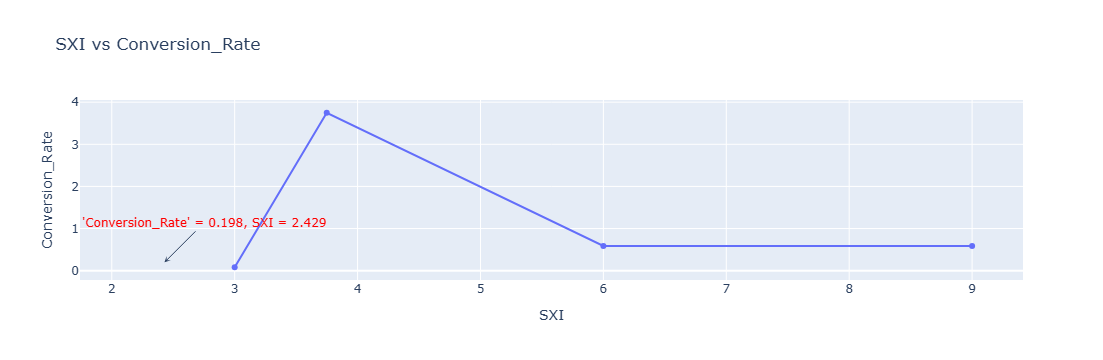

In [156]:
import plotly.graph_objects as go

# Given data
x = mean_dxi
y = conv_ratee

# Create the line plot
fig = go.Figure()

# Add the main line plot
fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers'))

# Add a vertical line at x = 7.427
fig.add_annotation(
    x=2.429, y=0.198,
    text="'Conversion_Rate' = 0.198, SXI = 2.429",
    showarrow=True,
    arrowhead=3,
    ax=40, ay=-40,
    font=dict(color="red")
)
# Add annotations and layout
fig.update_layout(
    title="SXI vs Conversion_Rate",
    xaxis_title="SXI",
    yaxis_title="Conversion_Rate",
    showlegend=False
)

# Show the figure
fig.show()


In [ ]:
20, 37.65,55.31

In [ ]:
conv_ratee,mean_dxi

In [ ]:
(10863-(10863*0.4469))

In [ ]:
2173, 4090, 6008

In [ ]:
conv_ratee,mean_dxi

In [ ]:
conv_ratee = [100.0, 46.09, 32.1757757993829]
mean_dxi = [0.9989887633584712, 1.07, 1.246108110411082]

In [ ]:
mean_dxi.insert(1,1.58)
conv_ratee.insert(1,24.22)

In [ ]:
mean_dxi[0] = 1.58
conv_ratee[0] = 16.12

# --------------------------------- SKIP BELOW GO TO CURVE FIT------------------------------

# Kmeans Start here - for classification target variable

In [ ]:
from sklearn.cluster import KMeans
# clusters = kmeans.elbow_value_
clusters =2
composite_dxi=np.array(composite_dxi1).reshape(-1, 1)  
kmeans = KMeans(n_clusters = clusters,random_state=0) 

kmeans.fit(composite_dxi) 
  
print((kmeans.labels_))

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(composite_dxi1,kmeans.labels_ ,c=kmeans.labels_.astype(float),cmap='viridis') 
plt.xlabel("composite dxi") 
plt.ylabel("kmeans label") 
plt.title("kmeans of composite dxi ") 
plt.show() 
#plt.savefig('kmeans_comp_dxi.png')

np.unique((kmeans.labels_),return_counts=True)

In [ ]:
np.unique(kmeans.labels_)

In [ ]:
v,c=np.unique(kmeans.labels_ , return_counts=True)

def index_value(y_train,n):
        index_value=[]
        for i in range(len(y_train)):
            if (y_train[i] == n):
              
                index_value.append(i)
        return index_value
    
buyers=index_value(list(yy),1)  # Put Good class or Class to be maximized (can be either 0 or 1)
non_buyers=index_value(list(yy),0) # Put Bad class or Class to be minimized (can be either 0 or 1)

kmean_label=kmeans.labels_


km_buyer=[]
for i in range(len(buyers)):
    km_buyer.append(kmean_label[buyers[i]])
    
km_non=[]
for i in range(len(non_buyers)):
    km_non.append(kmean_label[non_buyers[i]])


v,c1=np.unique(km_buyer , return_counts=True)
v_non,c_non1=np.unique(km_non , return_counts=True)


buy=c1
no_buyer=c_non1

buyer=[]
non_buyer=[]
vv=[]
nn=[]
for i in range(len(buy)):
    buyer.append(buy[i])

#buy=list(buy)
for i in range(clusters):
    vv.append(i)
    if i not in v:
        buyer.insert(i,0)
        
for i in range(len(no_buyer)):
    non_buyer.append(no_buyer[i])
    
for i in range(clusters):
    nn.append(i)
    if i not in v_non:
        non_buyer.insert(i,0)
buyer_conv = (np.array(buyer)/len(composite_dxi1))*100  

buyer_per=(buyer/(buyer+ (np.array(non_buyer))))*100





In [ ]:
buyer_conv

In [ ]:
no_buyer

In [ ]:
buyer_per

# # Analysis

In [ ]:
def index_value(y_train,n):
        index_value=[]
        for i in range(len(y_train)):
            if (y_train[i] == n):
              
                index_value.append(i)
        return index_value
    
xx=[]  
cluster_index=[]
for i in range(clusters):
    c1=index_value(kmean_label,i)
    cdx1=composite_dxi[c1]
    xx.append(cdx1)
    cluster_index.append(c1)
    
minimum_dxi=[]
maximum_dxi=[]
avg_dxi=[]
for i in range(len(xx)):
    minimum_dxi.append(np.min(xx[i]))
    maximum_dxi.append(np.max(xx[i]))
    avg_dxi.append(np.mean(xx[i]))


# Target Conversion Plot

In [ ]:
def conv_rate(avg_dxi,buyer_conv):
    dxi_sort=list(np.sort(avg_dxi))
    idx=[]
   
    for i in range(len(dxi_sort)):
        a=avg_dxi.index(dxi_sort[i])
        idx.append(a)
    
    buyer_c=buyer_conv[idx]

    conv_rate=[]
    convv=0
    for i in range(len(dxi_sort)):
       
        conv=convv+buyer_c[i]
        #print(conv)
        conv_rate.append(conv)
        convv=conv
    return dxi_sort,conv_rate

mean_dxi,conv_ratee=conv_rate(minimum_dxi,buyer_conv)  

In [ ]:
332.49647542/conv_ratee[2]

In [ ]:
17

In [ ]:
mean_dxi[2]

# ---------------------------CurveFit--------------------------------------

In [15]:
import matplotlib.pyplot as plt
import numpy as np
mymodel = np.poly1d(np.polyfit(mean_dxi, conv_ratee, 1))

myline = np.linspace(min(composite_dxi1), max(composite_dxi1), 100)


In [16]:
help(np.poly1d)

Help on class poly1d in module numpy:

class poly1d(builtins.object)
 |  poly1d(c_or_r, r=False, variable=None)
 |  
 |  A one-dimensional polynomial class.
 |  
 |  .. note::
 |     This forms part of the old polynomial API. Since version 1.4, the
 |     new polynomial API defined in `numpy.polynomial` is preferred.
 |     A summary of the differences can be found in the
 |     :doc:`transition guide </reference/routines.polynomials>`.
 |  
 |  A convenience class, used to encapsulate "natural" operations on
 |  polynomials so that said operations may take on their customary
 |  form in code (see Examples).
 |  
 |  Parameters
 |  ----------
 |  c_or_r : array_like
 |      The polynomial's coefficients, in decreasing powers, or if
 |      the value of the second parameter is True, the polynomial's
 |      roots (values where the polynomial evaluates to 0).  For example,
 |      ``poly1d([1, 2, 3])`` returns an object that represents
 |      :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2

In [17]:
import numpy

# Polynomial Regression
def polyfits(x, y, degree):
    results = {}
    
    coeffs = numpy.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)# or [p(z) for z in x]
    print('y_pred: ',yhat)
    from sklearn.metrics import r2_score
    r2 = r2_score(y,yhat)
    print('R-squared: ',r2_score(y,yhat))
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results,coeffs
results,coeffs = polyfits(myline,  mymodel(myline), 1)

y_pred:  [168.79366294 168.12211294 167.45056294 166.77901294 166.10746294
 165.43591294 164.76436294 164.09281294 163.42126294 162.74971294
 162.07816294 161.40661294 160.73506294 160.06351294 159.39196294
 158.72041294 158.04886294 157.37731295 156.70576295 156.03421295
 155.36266295 154.69111295 154.01956295 153.34801295 152.67646295
 152.00491295 151.33336295 150.66181295 149.99026295 149.31871295
 148.64716295 147.97561295 147.30406295 146.63251295 145.96096295
 145.28941295 144.61786295 143.94631295 143.27476295 142.60321295
 141.93166295 141.26011295 140.58856295 139.91701295 139.24546295
 138.57391296 137.90236296 137.23081296 136.55926296 135.88771296
 135.21616296 134.54461296 133.87306296 133.20151296 132.52996296
 131.85841296 131.18686296 130.51531296 129.84376296 129.17221296
 128.50066296 127.82911296 127.15756296 126.48601296 125.81446296
 125.14291296 124.47136296 123.79981296 123.12826296 122.45671296
 121.78516296 121.11361296 120.44206296 119.77051297 119.09896297
 

In [ ]:
332/283

In [74]:
123*0.8

98.4

In [ ]:
y = -9.55
y

In [78]:
a, b = coeffs  # Coefficients for the equation
print(f"The second-degree polynomial equation is: Clo2 Dosage(Kg/Ton) = {a:.3f}*SXI + {b:.3f}")

The second-degree polynomial equation is: Clo2 Dosage(Kg/Ton) = -4.107*SXI + 174.975


In [ ]:
coeffs = [  60.51293206, -103.12048348]

In [ ]:
(4016332.66 - coeffs[1])/coeffs[0]

In [ ]:
x = (y - coeffs[-1]) / coeffs[-2]
x

In [ ]:
help(numpy.polyfit)

In [ ]:
o = 2.65
y =  (coeffs[0]*-0.00425748) + (coeffs[1]) 
y

In [ ]:
coeffs[0]

In [18]:
poly_eq = "Bl. Pant Effluent Estimates = -4.11*SXI + 174.975"

In [ ]:
ya =[83.06346701, 77.93734481, 72.81122261, 67.68510041, 62.55897821,
       57.43285601, 52.30673381, 47.18061161, 42.05448941, 36.92836721,
       31.80224501, 26.67612281, 21.55000061, 16.42387841, 11.2977562 ,
        6.171634  ]
xa = [1.00536885, 1.02697856, 1.04858828, 1.07019799, 1.09180771,
       1.11341742, 1.13502714, 1.15663686, 1.17824657, 1.19985629,
       1.221466  , 1.24307572, 1.26468543, 1.28629515, 1.30790486,
       1.32951458]

In [ ]:
x_reshaped = xa
y =ya
# Fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_reshaped, y)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Given y
given_y =  6.171634

# Solve for x using the equation y = mx + c
given_x = (given_y - intercept) / slope

print("Corresponding x value:", given_x)

In [76]:
adf = pd.DataFrame({'sxi':(myline)[:],'Bl. Pant Effluent': mymodel(myline)[:]})
adf

,sxi,Bl. Pant Effluent
0,1.504831,168.793663
1,1.668326,168.122113
2,1.831821,167.450563
3,1.995316,166.779013
4,2.158811,166.107463
...,...,...
95,17.036853,104.996413
96,17.200348,104.324863
97,17.363843,103.653313
98,17.527338,102.981763


In [77]:
adf.to_csv('BlPantEffluentcorr.csv',index=False)

In [ ]:
slope

In [ ]:
intercept

In [ ]:
ya = 46.09

In [ ]:
df['composite_dxi'].mean() 36 , -48

In [75]:
 mymodel(myline)[:]

array([168.79366294, 168.12211294, 167.45056294, 166.77901294,
       166.10746294, 165.43591294, 164.76436294, 164.09281294,
       163.42126294, 162.74971294, 162.07816294, 161.40661294,
       160.73506294, 160.06351294, 159.39196294, 158.72041294,
       158.04886294, 157.37731295, 156.70576295, 156.03421295,
       155.36266295, 154.69111295, 154.01956295, 153.34801295,
       152.67646295, 152.00491295, 151.33336295, 150.66181295,
       149.99026295, 149.31871295, 148.64716295, 147.97561295,
       147.30406295, 146.63251295, 145.96096295, 145.28941295,
       144.61786295, 143.94631295, 143.27476295, 142.60321295,
       141.93166295, 141.26011295, 140.58856295, 139.91701295,
       139.24546295, 138.57391296, 137.90236296, 137.23081296,
       136.55926296, 135.88771296, 135.21616296, 134.54461296,
       133.87306296, 133.20151296, 132.52996296, 131.85841296,
       131.18686296, 130.51531296, 129.84376296, 129.17221296,
       128.50066296, 127.82911296, 127.15756296, 126.48

In [ ]:
myline[:-41]

In [ ]:
dicts = {'FINISHED': 1, 'INCOMPLETE': 0}
list(dicts.keys())

In [ ]:
a ='iui'
if 'ui' in a:
    print(True)

In [65]:
tv

'Bl. Pant Effluent Estimates'

In [ ]:
208/599

In [ ]:
599*0.2

In [ ]:
120*0.35

In [ ]:
120-42

In [34]:
myline[:]

array([ 1.50483146,  1.66832643,  1.8318214 ,  1.99531637,  2.15881134,
        2.3223063 ,  2.48580127,  2.64929624,  2.81279121,  2.97628618,
        3.13978115,  3.30327612,  3.46677109,  3.63026605,  3.79376102,
        3.95725599,  4.12075096,  4.28424593,  4.4477409 ,  4.61123587,
        4.77473084,  4.93822581,  5.10172077,  5.26521574,  5.42871071,
        5.59220568,  5.75570065,  5.91919562,  6.08269059,  6.24618556,
        6.40968052,  6.57317549,  6.73667046,  6.90016543,  7.0636604 ,
        7.22715537,  7.39065034,  7.55414531,  7.71764027,  7.88113524,
        8.04463021,  8.20812518,  8.37162015,  8.53511512,  8.69861009,
        8.86210506,  9.02560002,  9.18909499,  9.35258996,  9.51608493,
        9.6795799 ,  9.84307487, 10.00656984, 10.17006481, 10.33355978,
       10.49705474, 10.66054971, 10.82404468, 10.98753965, 11.15103462,
       11.31452959, 11.47802456, 11.64151953, 11.80501449, 11.96850946,
       12.13200443, 12.2954994 , 12.45899437, 12.62248934, 12.78

In [ ]:
def find_nearest_values(number, num_list):
    # Calculate absolute differences between the given number and each element in the list
    absolute_differences = [abs(number - x) for x in num_list]
    
    # Find the minimum absolute difference
    min_difference = min(absolute_differences)
    
    # Find the indices of elements with the minimum absolute difference
    nearest_indices = [i for i, diff in enumerate(absolute_differences) if diff == min_difference]
    
    # Create a list of nearest values
    nearest_values = [(num_list[i],i) for i in nearest_indices]
    index = nearest_values[-1]
    
    return nearest_values[-1][0],nearest_values[-1][1]

# Example usage:
number_to_find = 60
my_list =  mymodel(myline)

nearest_values,index = find_nearest_values(number_to_find, my_list)
print("Nearest values to", number_to_find, "are:", nearest_values)


In [ ]:
myline[:7]

In [ ]:
df[tv].mean()*0.8

In [ ]:
import matplotlib.pyplot as plt
 

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Conversion Rate vs DXI')
ax.plot((myline)[:], mymodel(myline)[:],'y') 

# ax.scatter(df['composite_dxi'].mean(), df[tv].mean(), marker='o',label = 'Current Squared Error & SXI')
# ax.scatter([2],[50813.06], marker='x',color = 'red',label = 'Target total CO2 emissions(Kilotons) & SXI') #Labelling Target SXI
ax.ticklabel_format(useOffset=False,style='plain')
plt.grid(b=True, which='major', color='black', linestyle='-')
 
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='blue', linestyle='-', alpha=0.2)

plt.title("Correlation graph: Squared Error & SXI")
plt.legend(loc='upper left')
plt.xlabel("SXI")
plt.ylabel("Squared Error")
#plt.savefig('conv_dxi.png')


In [ ]:
mean_dxi,conv_ratee

In [ ]:
conv_ratee[1]*0.9

In [ ]:
61.74*0.64

In [ ]:
(myline)[:-13]

In [ ]:
mymodel(myline)[:-13]

In [ ]:
df[tv].mean()

In [ ]:
(myline)[:]

In [ ]:
283.86/201.47

In [ ]:
yasas = [-6.16502756e+00, -5.13874534e+00, -4.11246313e+00, -3.08618092e+00,
       -2.05989871e+00, -1.03361650e+00, -7.33428413e-03,  1.01894793e+00,
        2.04523014e+00,  3.07151235e+00,  4.09779456e+00,  5.12407678e+00,
        6.15035899e+00,  7.17664120e+00,  8.20292341e+00]
yasas

In [ ]:
j = (myline).tolist() 
k = mymodel(myline).tolist() + [33.5]
k

In [ ]:
mean_dxi[6]

In [ ]:
79*1.0533

In [ ]:
5.33/3

In [ ]:
417.803*1.1

In [ ]:
conv_ratee

In [ ]:
40.97/3

In [ ]:
conv_ratee[4]*1.15

In [21]:
123*0.95

116.85

In [ ]:
df=pd.read_csv('concretecorr.csv',low_memory = False)#read full data dxi
df

In [ ]:
xaxis = list(df['sxi'])
yaxis = list(df['Concrete compressive strength(MPa)'])

Text(0, 0.5, 'Bl. Pant Effluent Estimates')

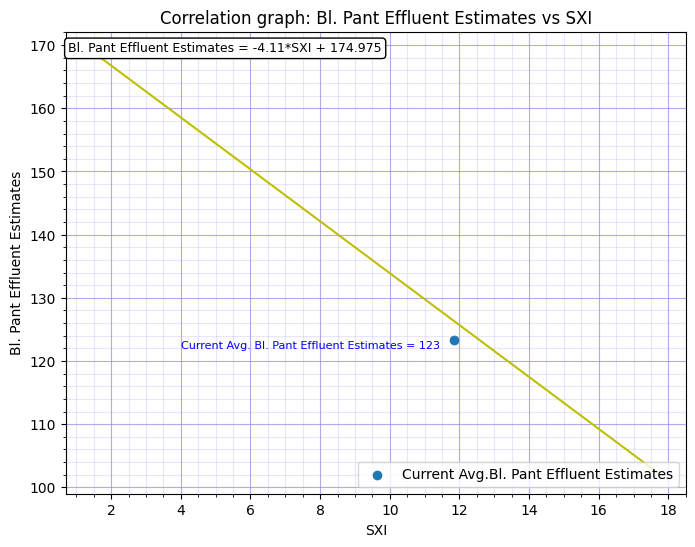

In [64]:
import matplotlib.pyplot as plt
 

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(8, 6))
plt.ticklabel_format(style='plain', axis='y')
#fig.suptitle('Con7version Rate vs DXI')
# ax.plot(xaxis, yaxis,'y') 
ax.plot((myline)[:],  mymodel(myline)[:],'y') 
# ax.scatter(1.935, -9.55, marker='o')
ax.scatter(11.84, 123.33, marker='o',label= f'Current Avg.{tv}')
plt.text(4, 123.33, str(f'Current Avg. {tv} = 123'), ha='left', va='top',fontsize=8, color='blue')

# ax.scatter([14.15],[117], marker='x',color = 'red',label = 'Immediate Improvement') #Labelling Target SXI
# plt.text(5.3, 117, str(f'Avg.{tv} = 117 - 5% Decrease'), ha='left', va='center',fontsize=8, color='red')

# ax.scatter([15.76],[110], marker='x',color = '#170b16',label = 'Mid-Term Improvement')#Labelling Target SXI
# plt.text(6.3, 110 , str(f'Avg.{tv} = 110 - 10.57% Decrease'), ha='left', va='center',fontsize=8, color='#170b16')

# ax.scatter([17.69],[102], marker='x',color = '#078200',label = 'Long-Term Improvement')#Labelling Target SXI
# plt.text(8.3, 102, str(f'Avg.{tv} = 102 - 17.07% Decrease'), ha='left', va='center',fontsize=8, color='#078200')


plt.grid(which='major', color='#9585e6', linestyle='-',alpha=0.7)

# plt.axvline(x=mean_dxi[0], color='blue' ,label='Current Good Quality Samples(%) & SXI',ymax=0.42,ymin=0)
# plt.axhline(y=conv_ratee[0], color='blue',xmax=0.42,xmin=0)
# plt.axvline(x=13.95, color='red',label = 'Initial Improvement',ymax=0.5,ymin=0)
# plt.axhline(y=27.54, color='red',xmax=0.5,xmin=0)
# plt.axvline(x=14.92, color='#170b16',label = 'Mid-Term Improvement',ymax=0.7,ymin=0)
# plt.axhline(y=39.88, color='#170b16',xmax=0.7,xmin=0)
# plt.axvline(x=16.05, color='#078200',label = 'Long-Term Improvement',ymax=0.95,ymin=0)
# plt.axhline(y=54.18, color='#078200',xmax=0.95,xmin=0)
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid( which='minor', color='#9585e6', linestyle='-', alpha=0.2)
plt.text(0.51, 0.95, poly_eq, transform=ax.transAxes, fontsize=9, 
         color='black', ha='right', va='bottom', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.title(f'Correlation graph: {tv} vs SXI')
plt.legend(loc='lower right')#fig.legend(loc='outside right upper') loc='center left', bbox_to_anchor=(1, 0.5)
plt.xlabel("SXI")
plt.ylabel(f'{tv}')
#plt.savefig('conv_dxi.png')7

In [ ]:
5020415.82 - 76968.56

In [ ]:
df=pd.read_csv('belitecorr.csv',low_memory = False)#read full data dxi
df

In [ ]:
xaxis = list(df['sxi'])
yaxis = list(df['% of Belite (C2S)'])

In [ ]:
import matplotlib.pyplot as plt
 

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Con7version Rate vs DXI')
ax.plot(xaxis, yaxis,'y') 

# ax.scatter(1.935, -9.55, marker='o')
ax.scatter(10.19, 79.33, marker='o',label= f'Current Avg.Belite Synthesis (C2S)')
plt.text(5.7, 79.33, str(f'Current Avg. Belite Synthesis (C2S) = 79.33%'), ha='left', va='top',fontsize=8, color='blue')

ax.scatter([12.01],[80.52], marker='x',color = 'red',label = 'Immediate Improvement') #Labelling Target SXI
plt.text(7.3, 80.52, str(f'Belite Synthesis (C2S) = 80.52% - 1.5% Increase'), ha='left', va='center',fontsize=8, color='red')

ax.scatter([12.81],[81.87], marker='x',color = '#170b16',label = 'Mid-Term Improvement')#Labelling Target SXI
plt.text(7.9, 81.87 , str(f'Belite Synthesis (C2S) = 81.87% - 3.20% Increase'), ha='left', va='center',fontsize=8, color='#170b16')

ax.scatter([13.50],[83.21], marker='x',color = '#078200',label = 'Long-Term Improvement')#Labelling Target SXI
plt.text(8.6, 83.21, str(f'Belite Synthesis (C2S) = 83.21% - 4.89% Increase'), ha='left', va='center',fontsize=8, color='#078200')


plt.grid(which='major', color='#9585e6', linestyle='-')
plt.minorticks_on()
plt.grid( which='minor', color='#9585e6', linestyle='-', alpha=0.2)

plt.title(f'Correlation graph: Belite Synthesis (C2S) vs SXI')
plt.legend(loc='lower right')#fig.legend(loc='outside right upper')
plt.xlabel("SXI")
plt.ylabel(f'% of Belite(C2S)')
#plt.savefig('conv_dxi.png')

In [ ]:
df=pd.read_csv('limecorr.csv',low_memory = False)#read full data dxi
df

In [ ]:
xaxis = list(df['sxi'])
yaxis = list(df['% of lime'])

In [ ]:
import matplotlib.pyplot as plt
 

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Con7version Rate vs DXI')
ax.plot(xaxis, yaxis,'y') 

# ax.scatter(1.935, -9.55, marker='o')
ax.scatter(7.43, 67.99, marker='o',label= f'Current Avg. Lime Synthesis')
plt.text(4.2, 68.12, str(f'Current Avg. Lime Synthesis = 67.99%'), ha='left', va='top',fontsize=8, color='blue')

# ax.scatter([9.80],[74.79], marker='x',color = 'red',label = 'Immediate Improvement') #Labelling Target SXI
# plt.text(6.25, 74.79, str(f'Lime Synthesis = 74.79% - 10% Increase'), ha='left', va='center',fontsize=8, color='red')

# ax.scatter([11.15],[84.99], marker='x',color = '#170b16',label = 'Mid-Term Improvement')#Labelling Target SXI
# plt.text(7.7, 84.99 , str(f'Lime Synthesis = 84.31% - 25% Increase'), ha='left', va='center',fontsize=8, color='#170b16')

# ax.scatter([12.52],[95.85], marker='x',color = '#078200',label = 'Long-Term Improvement')#Labelling Target SXI
# plt.text(8.8, 95.85, str(f'Lime Synthesis = 95.85% - 40.98% Increase'), ha='left', va='center',fontsize=8, color='#078200')


plt.grid(which='major', color='#9585e6', linestyle='-')
plt.minorticks_on()
plt.grid( which='minor', color='#9585e6', linestyle='-', alpha=0.2)

plt.title(f'Correlation graph: Lime Synthesis vs SXI')
plt.legend(loc='lower right')#fig.legend(loc='outside right upper')
plt.xlabel("SXI")
plt.ylabel(f'% of Lime')

In [ ]:
67.99*1.25

In [ ]:
95.85/67.99

In [ ]:
83.21/79.33

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
scatter_trace = go.Scatter(
    x=[mean_dxi[1]],
    y=[conv_ratee[1]],
    mode='markers',
    marker=dict(size=10, symbol='circle',color='blue'),
    name='Current Not a Backorder Rate & SXI',
    hovertemplate='<b>Current SXI: %{x:.2f}</b><br><b>Current Backorder_Rate: %{y:.2f}</b>'
    
)

line_trace = go.Scatter(
    x=myline,
    y=mymodel(myline),
    mode='lines',
    line=dict(color='red', width=2),
    name = 'SXI vs Backorders',
    hovertemplate='<b>SXI: %{x:.2f}</b><br><b>Backorder_Rate: %{y:.2f}</b>'
)

layout = go.Layout(
    title="Correlation graph: Not a Backorder Rate (%) & SXI",
    xaxis=dict(
        title="SXI",
        showgrid=True,    # Show major grid lines
        gridcolor='rgba(0, 0, 0, 1)',  # Black color with transparency
        showline=True,    # Show axis line
        dtick=1,           # Set the tick interval for minor grid lines
        minor=dict(showgrid=True, gridcolor='rgba(128, 128, 128, 0.4)')
    ),
    yaxis=dict(
        title="Not a Backorder Rate (%)",
        showgrid=True,    # Show major grid lines
        gridcolor='rgba(0, 0, 0, 1)',  # Black color with transparency
        showline=True,    # Show axis line
        dtick=10,          # Set the tick interval for minor grid lines
        minor=dict(showgrid=True, gridcolor='rgba(128, 128, 128, 0.4)')
    ),
    legend=dict(x=0, y=1.01),
    margin=dict(l=60, r=20, t=70, b=60),
#     hovermode='x unified',
)
fig = go.Figure(data=[scatter_trace1,line_trace], layout=layout)

fig.update_traces(hoverlabel=dict(namelength=1))
fig.update_layout(plot_bgcolor='rgb(215, 252, 225)')
# fig.update_traces(hovertemplate='<b>SXI:%{x:.2f}</b><br><b>Backorder_Rate: %{y:.2f}</b>')
fig.show()

In [ ]:
scatter_trace1 = go.Scatter(
    x=[mean_dxi[1]],
    y=[conv_ratee[1]],
    mode='markers',
    marker=dict(size=10, symbol='circle',color='blue'),
    name='Current Not a Backorder Rate & SXI',
    hovertemplate='<b>Current SXI: %{x:.2f}</b><br><b>Current Backorder_Rate: %{y:.2f}</b>'
    
)
scatter_trace2 = go.Scatter(
    x=[4.03],
    y=[85.86],
    mode='markers',
    marker=dict(size=10, symbol='x',color="green"),
    name='Target Not a Backorder Rate & SXI',
    hovertemplate='<b>Target SXI: %{x:.2f}</b><br><b>Target Backorder_Rate: %{y:.2f}</b>'
)
line_trace = go.Scatter(
    x=myline,
    y=mymodel(myline),
    mode='lines',
    line=dict(color='red', width=2),
    name = 'SXI vs Backorders',
    hovertemplate='<b>SXI: %{x:.2f}</b><br><b>Backorder_Rate: %{y:.2f}</b>'
)

layout = go.Layout(
    title="Correlation graph: Not a Backorder Rate (%) & SXI",
    xaxis=dict(
        title="SXI",
        showgrid=True,    # Show major grid lines
        gridcolor='rgba(0, 0, 0, 1)',  # Black color with transparency
        showline=True,    # Show axis line
        dtick=1,           # Set the tick interval for minor grid lines
        minor=dict(showgrid=True, gridcolor='rgba(128, 128, 128, 0.4)')
    ),
    yaxis=dict(
        title="Not a Backorder Rate (%)",
        showgrid=True,    # Show major grid lines
        gridcolor='rgba(0, 0, 0, 1)',  # Black color with transparency
        showline=True,    # Show axis line
        dtick=10,          # Set the tick interval for minor grid lines
        minor=dict(showgrid=True, gridcolor='rgba(128, 128, 128, 0.4)')
    ),
    legend=dict(x=0, y=1.01),
    margin=dict(l=60, r=20, t=70, b=60),
#     hovermode='x unified',
)
fig = go.Figure(data=[scatter_trace1,scatter_trace2, line_trace], layout=layout)

fig.update_traces(hoverlabel=dict(namelength=1))
fig.update_layout(plot_bgcolor='rgb(215, 252, 225)')
# fig.update_traces(hovertemplate='<b>SXI:%{x:.2f}</b><br><b>Backorder_Rate: %{y:.2f}</b>')
fig.show()

In [ ]:
mean_dxi,conv_ratee

In [ ]:
#4FFFB0
#32de84
#4FFFB0
#20B2AA
#00FF00
#66CDAA
# 215, 252, 225 LIGHT1
# 203, 247, 215 LIGHT

In [ ]:
myline # sxi

In [ ]:
mymodel(myline) # target outcome rate - not a bacckorder rate

In [ ]:
78.274 + 5

In [ ]:
ty = pd.read_csv('Airline_Reviews.csv',low_memory=False)
ty

In [ ]:
ty['Route'].value_counts()

In [ ]:
mymodel = [83.06346701, 77.93734481, 72.81122261, 67.68510041, 62.55897821,
       57.43285601, 52.30673381, 47.18061161, 42.05448941, 36.92836721,
       31.80224501, 26.67612281, 21.55000061, 16.42387841, 11.2977562 ,
        6.171634 ]

myline = [1.00536885, 1.02697856, 1.04858828, 1.07019799, 1.09180771,
       1.11341742, 1.13502714, 1.15663686, 1.17824657, 1.19985629,
       1.221466  , 1.24307572, 1.26468543, 1.28629515, 1.30790486,1.32951458]

In [ ]:
tv = 'Readmission rate'

In [ ]:
currsxi = 1.07
currconv= 46.09

In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()


line_trace = go.Scatter(x=myline, y=mymodel, mode='lines', line=dict(color='#C99700', width=2), name=f'SXI ', hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+tv +': %{y:.2f}</b>')
fig.add_trace(line_trace)
# Assuming myline, mymodel, mean_dxi, conv_ratee, x, y, and tv are defined
# Add traces
# fig.add_trace(go.Scatter(x=myline[:], y=mymodel[:], mode='lines', line=dict(color='#C99700')))#, name='Conversion Rate'
fig.add_trace(go.Scatter(x=[currsxi], y=[currconv], mode='markers', marker=dict(color='blue', symbol='circle'), name=f'Current {tv}'))

x1 = 1.18  # initial
y1 = 46.09 * .9  # initial
x2 = 1.33  # long term
y2 = mymodel[-1]  # long term

# Define annotations
initial_term = {'color': 'red', 'symbol': 'x', 'name': f'Initial {tv}', 'x': x1, 'y': y1, 'per':10,'lab':'Initial '}
long_term = {'color': '#078200', 'symbol': 'x', 'name': f'Long-term {tv}', 'x': x2, 'y': y2,'per':88,'lab':'Long-Term '}
current = {'color': 'blue', 'symbol': 'x', 'name': f'Current {tv}', 'x': currsxi, 'y': currconv,'per':88,'lab':'Current '}

# Add shapes and annotations for "Initial", "Long-term", and "Current"
shapes = [initial_term, long_term, current]

for shape in shapes:
  fig.add_trace(go.Scatter(x=[shape['x']], y=[shape['y']], mode='markers', marker=dict(color=shape['color'], symbol='x'), name=shape['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+shape['lab']  +tv +': %{y:.2f}%</b>'))
  fig.add_shape(type='line', x0=shape['x'], x1=shape['x'], y0=0, y1=shape['y'], line=dict(color=shape['color'], dash='dash'), name=shape['name'])
  fig.add_shape(type='line', x0=1, x1=shape['x'], y0=shape['y'], y1=shape['y'], line=dict(color=shape['color'], dash='dash'), name=shape['name'])
  if shape['name'] == f'Initial {tv}':  
        ay_value = -32  
  else:
      ay_value = -40 
  fig.add_annotation(
      x=shape['x'], y=shape['y'],
      text=f'{shape["name"]}= {shape["per"]:.2f}%',
      showarrow=True,
      arrowhead=2,
      arrowcolor=shape['color'],
      font=dict(color=shape['color']),
      ax=0,  
      ay=ay_value  
  )

mid_term = {
    'x': (x1 + x2) / 2,
    'y': (y1 + y2) / 2,
    'color': '#170b16',
    'dash': 'dashdot',
    'name': f'Mid-term {tv}',
    'per': 50,
    'lab':'Mid-Term '}

fig.add_trace(go.Scatter(x=[mid_term['x']], y=[mid_term['y']], mode='markers', marker=dict(color=mid_term['color'], symbol='x'), name=mid_term['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+mid_term['lab']  +tv +': %{y:.2f}%</b>'))
fig.add_shape(type='line', x0=mid_term['x'], x1=mid_term['x'], y0=0, y1=mid_term['y'], line=dict(color=mid_term['color'], dash=mid_term['dash']), name=mid_term['name'])
fig.add_shape(type='line', x0=1, x1=mid_term['x'], y0=mid_term['y'], y1=mid_term['y'], line=dict(color='#170b16', dash='dashdot'), name='Mid-Term Improvement')
fig.add_annotation(
        x=mid_term['x'], y=mid_term['y'], 
        text=f'{mid_term["name"]}= {mid_term["per"]:.2f}%', 
        showarrow=True, 
        arrowhead=2, 
        arrowcolor=mid_term['color'], 
        font=dict(color=mid_term['color']),
        ax=0,  # No horizontal movement
        ay=-40  # Arrow points up
    )



# Update layout
layout = go.Layout(
    autosize=True,
    title="Correlation graph",
    xaxis=dict(
        title="SXI",
        showgrid=True,
        gridcolor='#9585e6',  # gridcolor with transparency
        showline=True,
        minor=dict(showgrid=True, gridcolor='rgba(149, 133, 230, 0.4)')
    ),

    yaxis=dict(
        title=f"{tv} %",
        showgrid=True,
        gridcolor='#9585e6',  # gridcolor with transparency
        showline=True,
        minor=dict(showgrid=True, gridcolor='rgba(149, 133, 230, 0.4)')
    ),
    showlegend=True,
    # legend=dict(x=0, y=1.01),
    legend=dict(yanchor="top",
    xanchor="left",
    ),
    margin=dict(l=60, r=20, t=70, b=60),
    
)

fig.update_layout(layout,)

fig.show()

In [ ]:
for i in shapes:
    print(i['lab'])

In [ ]:
mymodel = [ 0.        ,  0.84847642,  1.69695283,  2.54542925,  3.39390566,
        4.24238208,  5.09085849,  5.93933491,  6.78781132,  7.63628774,
        8.48476415,  9.33324057, 10.18171698, 11.0301934 , 11.87866981,
       12.72714623, 13.57562265, 14.42409906, 15.27257548, 16.12105189,
       16.96952831, 17.81800472, 18.66648114, 19.51495755, 20.36343397,
       21.21191038, 22.0603868 , 22.90886321, 23.75733963, 24.60581604,
       25.45429246, 26.30276887, 27.15124529, 27.99972171, 28.84819812,
       29.69667454, 30.54515095, 31.39362737, 32.24210378, 33.0905802 ,
       33.93905661, 34.78753303, 35.63600944, 36.48448586, 37.33296227,
       38.18143869, 39.0299151 , 39.87839152, 40.72686794, 41.57534435,
       42.42382077, 43.27229718, 44.1207736 , 44.96925001, 45.81772643,
       46.66620284, 47.51467926, 48.36315567, 49.21163209, 50.0601085 ,
       50.90858492, 51.75706133, 52.60553775, 53.45401416, 54.30249058,
       55.150967  , 55.99944341, 56.84791983, 57.69639624, 58.54487266,
       59.39334907, 60.24182549, 61.0903019 , 61.93877832, 62.78725473,
       63.63573115, 64.48420756, 65.33268398, 66.18116039, 67.02963681,
       67.87811323, 68.72658964, 69.57506606, 70.42354247, 71.27201889,
       72.1204953 , 72.96897172, 73.81744813, 74.66592455, 75.51440096,
       76.36287738, 77.21135379, 78.05983021, 78.90830662, 79.75678304,
       80.60525945, 81.45373587, 82.30221229, 83.1506887 , 83.99916512]

In [ ]:
model_myline = [83.06346701, 77.93734481, 72.81122261, 67.68510041, 62.55897821,
       57.43285601, 52.30673381, 47.18061161, 42.05448941, 36.92836721,
       31.80224501, 26.67612281, 21.55000061, 16.42387841, 11.2977562 ,
        6.171634 ]

myline = [1.00536885, 1.02697856, 1.04858828, 1.07019799, 1.09180771,
       1.11341742, 1.13502714, 1.15663686, 1.17824657, 1.19985629,
       1.221466  , 1.24307572, 1.26468543, 1.28629515, 1.30790486,1.32951458]

In [ ]:
avg_composite_dxi = 1.16
coeffs = [-237.21377941,  321.55081145]
ylab = 'Readmission Rate'
import plotly

In [ ]:
outyp = 'bad'
perc_chang = 10
currout = 46.09
# else:
#     target_out = (df[tv].value_counts()[bad]/len(df))*100

def reverse_equation(y, m, c):
    return (y-c)/m

target_out = currout * (1-(perc_chang/100))

target_out = round(target_out, 2)

target_sxi = reverse_equation(target_out, coeffs[-2], coeffs[-1])
# target_out,index = find_nearest_values(target_out, model_myline)
# target_sxi = round(myline[index],2)
pchg = ((target_out - currout)/currout)*100
if coeffs[-2] < 0:
    rltyp = 'Negative'
    xpos = max(myline)
    ypos = max(model_myline)
else:
    xpos = min(myline)
    ypos = max(model_myline)
    rltyp = 'Positive'

if coeffs[-1] < 0:
    equation_str = f"y = {coeffs[-2]:.2f}x - {abs(coeffs[-1]):.2f}"
else:
    equation_str = f"y = {coeffs[-2]:.2f}x + {abs(coeffs[-1]):.2f}"
print(f"Equation of the linear line as a string:{equation_str}")

import plotly.express as px
import plotly.graph_objects as go
# if outyp == 'good':
#     lab = f'{tv}_{mapping[good]}'
# else:
#     lab = f'{tv}_{mapping[bad]}'
# # if corr == 'Positive':
#     lab = f'{tv}_{mapping[good]}'
# else:
#     lab = f'{tv}_{mapping[bad]}'

fig = go.Figure()
line_trace = go.Scatter(x=myline, y=model_myline, mode='lines', line=dict(color='#C99700', width=2), name=f'SXI vs {ylab}', hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+ylab +': %{y:.2f}</b>')
fig.add_trace(line_trace)

# fig.add_trace(go.Scatter(x=myline[:], y=mymodel[:], mode='lines', line=dict(color='#C99700')))#, name='Conversion Rate'
fig.add_trace(go.Scatter(x=[avg_composite_dxi], y=[currout], mode='markers', marker=dict(color='blue', symbol='circle'), name=f'Current {ylab}'))

# x1 = 4.55  # initial
# y1 = 39.9  # initial

y2 = min(model_myline)  # long term
x2 = reverse_equation(y2, coeffs[-2], coeffs[-1])# long term
lt = round(((y2 - currout)/currout)*100,2)

initial_term = {'color': 'red', 'symbol': 'x', 'name': f'Initial Improvement', 'x': target_sxi, 'y': target_out, 'per':pchg,'lab':'Initial '}
long_term = {'color': '#078200', 'symbol': 'x', 'name': f'Long-Term Improvement', 'x': x2, 'y': y2,'per':lt,'lab':'Long-Term '}
current = {'color': 'blue', 'symbol': 'x', 'name': f'Current {ylab}', 'x': avg_composite_dxi, 'y': currout,'per':0,'lab':'Current '}

# Add shapes and annotations for "Initial", "Long-term", and "Current"
shapes = [initial_term, long_term, current]

for shape in shapes:
    if shape['per'] == 0:
        fig.add_trace(go.Scatter(x=[shape['x']], y=[shape['y']], mode='markers', marker=dict(color=shape['color'], symbol='x',size=8), name=shape['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+shape['lab']  +ylab +': %{y:.2f}%</b>'))
    else:
        text=f'{shape["name"]}: {abs(shape["per"]):.2f}% Decrease'
        fig.add_trace(go.Scatter(x=[shape['x']], y=[shape['y']], mode='markers', marker=dict(color=shape['color'], symbol='x',size=8), name=shape['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+shape['lab']  +ylab +': %{y:.2f}%</b><br><b>'+text))

    # fig.add_shape(type='line', x0=shape['x'], x1=shape['x'], y0=model_myline[0], y1=shape['y'], line=dict(color=shape['color'], dash='dash'), name=shape['name'])
    # fig.add_shape(type='line', x0=myline[-1], x1=shape['x'], y0=shape['y'], y1=shape['y'], line=dict(color=shape['color'], dash='dash'), name=shape['name'])
    if shape['name'] == f'Initial {ylab}':
        ay_value = -32  
    else:
        ay_value = -40
    # if shape['per'] == 0: 
    #     fig.add_annotation(
    #         x=shape['x'], y=shape['y'],
    #         text=f'{shape["name"]}= {shape["y"]:.2f}%',
    #         showarrow=True,
    #         arrowhead=2,
    #         arrowcolor=shape['color'],
    #         font=dict(color=shape['color']),
    #         ax=0,  
    #         ay=ay_value  
    #     )
    # else:
    #     fig.add_annotation(
    #         x=shape['x'], y=shape['y'],
    #         text=f'{shape["name"]}= {shape["per"]:.2f}% Decrease',
    #         showarrow=True,
    #         arrowhead=2,
    #         arrowcolor=shape['color'],
    #         font=dict(color=shape['color']),
    #         ax=0,  
    #         ay=ay_value  
    #     )

mt =  ((((target_out + y2) / 2) - currout)/currout)*100
mid_term = {
    'x': reverse_equation((target_out + y2) / 2, coeffs[-2], coeffs[-1]),
    'y': (target_out + y2) / 2,
    'color': '#170b16',
    'dash': 'dashdot',
    'name': f'Mid-Term Improvement',
    'per': mt,
    'lab':'Mid-Term '}

text=f'{mid_term["name"]}: {abs(mid_term["per"]):.2f}% Decrease'
fig.add_trace(go.Scatter(x=[mid_term['x']], y=[mid_term['y']], mode='markers', marker=dict(color=mid_term['color'], symbol='x',size=8), name=mid_term['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+mid_term['lab']  +ylab +': %{y:.2f}%</b><br><b>'+text))
# fig.add_shape(type='line', x0=mid_term['x'], x1=mid_term['x'], y0=model_myline[0], y1=mid_term['y'], line=dict(color=mid_term['color'], dash=mid_term['dash']), name=mid_term['name'])
# fig.add_shape(type='line', x0=myline[-1], x1=mid_term['x'], y0=mid_term['y'], y1=mid_term['y'], line=dict(color='#170b16', dash='dashdot'), name='Mid-Term Improvement')
# fig.add_annotation(
#         x=mid_term['x'], y=mid_term['y'], 
#         , 
#         showarrow=True, 
#         arrowhead=2, 
#         arrowcolor=mid_term['color'], 
#         font=dict(color=mid_term['color']),
#         ax=0,  
#         ay=-40 
#     )
fig.add_annotation(

    x=xpos,  
    y=ypos, 
    text=f'<b>Line Equation</b><br>{equation_str}',   # Your custom text
    showarrow=False,
    font=dict(
        size=12,
        color="black"  # Customize font color
    ),
    align="center",
    bgcolor="white",  # Background color for the annotation
    bordercolor="black",  # Border color for the annotation
    borderpad=4  # Padding around the text
)
# Update layout
layout = go.Layout(
    autosize=True,
    title=f'Correlation Graph: SXI vs {ylab}',
    xaxis=dict(
        title="SXI (x)",
        showgrid=True,
        gridcolor='#9585e6',  # gridcolor with transparency
        showline=True,
        minor=dict(showgrid=True, gridcolor='rgba(149, 133, 230, 0.4)')
    ),

    yaxis=dict(
        title=f"{ylab} (y)",
        showgrid=True,
        gridcolor='#9585e6',  # gridcolor with transparency
        showline=True,
        minor=dict(showgrid=True, gridcolor='rgba(149, 133, 230, 0.4)')
    ),
    showlegend=True,
    # legend=dict(x=0, y=1.01),
    legend=dict(yanchor="top",
    xanchor="left",
    ),
    margin=dict(l=60, r=20, t=70, b=60),

)

fig.update_layout(layout)
corrloc = fig.to_html(full_html=False, default_height='400px', default_width='100%')
plotly.offline.plot(fig, filename='corrl.html', auto_open=False)

In [ ]:
fig

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
(myline)[40:], mymodel(myline)[40:],
# Assuming you have your data in X and y
# conv_ratee,mean_dxi
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array((myline)[40:]).reshape(-1, 1),  mymodel(myline)[40:], test_size=0.2, random_state=42)

# Transforming features to include polynomial terms up to degree 3

# Fitting the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating R-squared
r2 = r2_score(y_t, y_pred)
print("R-squared:", r2)


In [ ]:
mean_dxi.to_array()

In [ ]:
x[2]

In [ ]:
import plotly.graph_objects as go

# Data
x = mean_dxi
y = conv_ratee

# Create a line plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines+markers', name='Line Plot'))

# Add a horizontal line at y=107.95
fig.add_shape(
    type="line",
    x0=min(x),
    y0=y[2],
    x1=max(x),
    y1=y[2],
    line=dict(color="Red", width=2),
    name="Horizontal Line"
)

# Add the average SXI annotation
fig.add_annotation(
    x=0.30,  # x-position as a fraction of plot width
    y=0.70,  # y-position as a fraction of plot height
    xref="paper",
    yref="paper",
    text="Current Avg. Gas Production: 2565 cu ft",
    showarrow=False,
    font=dict(color="black", size=12),
    bordercolor="black",
    borderwidth=0,
    borderpad=0,
    bgcolor="White",
    align="right"
)

# Add a red horizontal line to the left of the annotation
# fig.add_shape(
#     type="line",
#     x0=0.87,  # x-position as a fraction of plot width
#     y0=0.99,  # y-position as a fraction of plot height
#     x1=0.96,  # x-position as a fraction of plot width
#     y1=0.99,  # y-position as a fraction of plot height
#     xref="paper",
#     yref="paper",
#     line=dict(color="Red", width=2)
# )

# Update layout
fig.update_layout(
    xaxis_title='SXI',
    yaxis_title='Gas Production (cu ft)',
    legend_title='Legend',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Show the plot
fig.show()